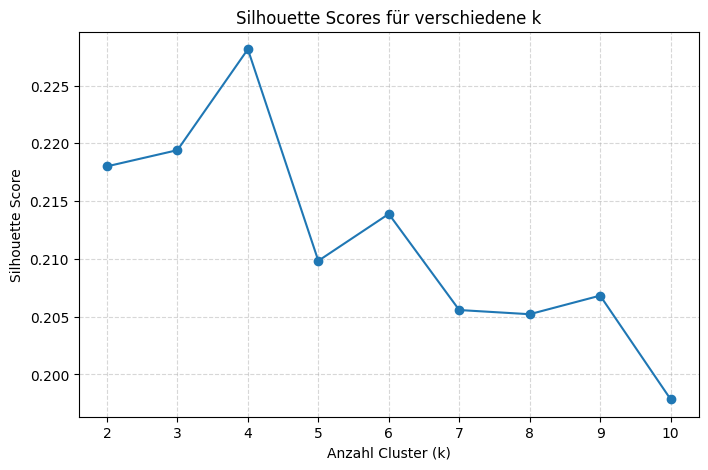

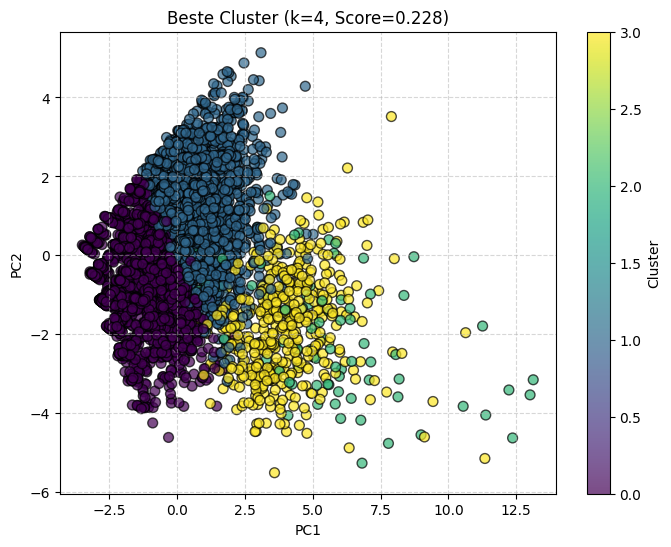

Beste Clusterzahl (Silhouette): 4 mit Score: 0.22814960086689934


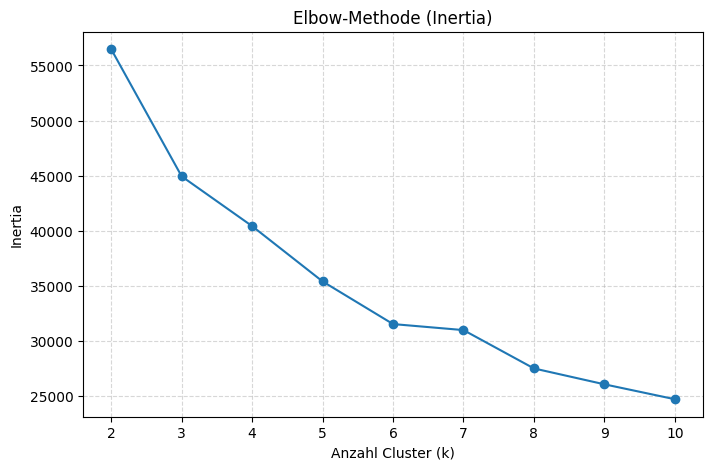

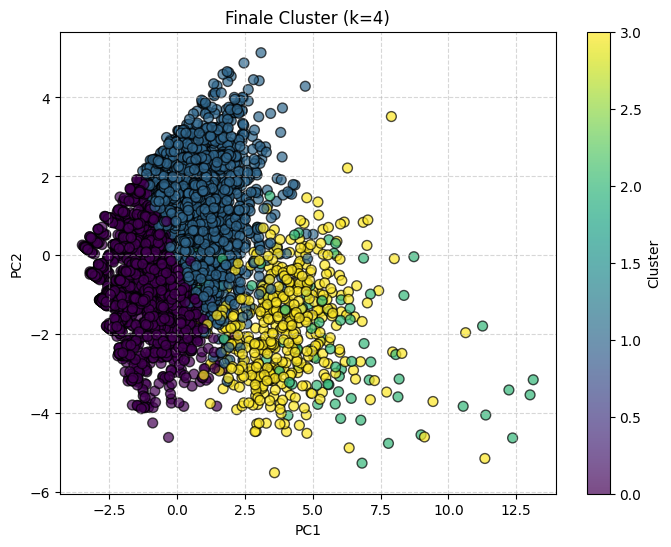

In [2]:
import pandas as pd
from src.setup import get_base
from src.feature_engineering import engineer_features
from src.clustering_utils import silhouette_analysis, elbow_method, build_cluster_pipeline, plot_pca_clusters

# ------------------------------
# Daten laden & Feature Engineering
# ------------------------------
df = get_base()
df_features = engineer_features(df)

# Nur numerische Spalten fürs Clustering
X = df_features.select_dtypes(include=["float64", "int64"]).fillna(0)

# ------------------------------
# Silhouette-Analyse
# ------------------------------
best_k, best_score, silhouette_scores = silhouette_analysis(X, k_range=range(2, 11))

print("Beste Clusterzahl (Silhouette):", best_k, "mit Score:", best_score)

# ------------------------------
# Elbow-Methode
# ------------------------------
inertias = elbow_method(X, k_range=range(2, 11))

# ------------------------------
# Finales Clustering mit best_k
# ------------------------------
pipeline = build_cluster_pipeline(n_clusters=best_k)
pipeline.fit(X)

labels = pipeline["kmeans"].labels_
pca_data = pipeline["pca"].transform(pipeline["scaler"].transform(X))

# Cluster Plot
plot_pca_clusters(pca_data, labels, title=f"Finale Cluster (k={best_k})")

In [ ]:
import pandas as pd
from src.feature_engineering import engineer_features
from src.clustering_utils import silhouette_analysis, elbow_method, build_cluster_pipeline, plot_pca_clusters, export_cluster_report, choose_pca_components

# ------------------------------
# Daten laden & Feature Engineering
# ------------------------------
df = get_base()
df_features = engineer_features(df)

# Nur numerische Spalten fürs Clustering
X = df_features.select_dtypes(include=["float64", "int64"]).fillna(0)

# ------------------------------
# PCA-Komponenten automatisch wählen (95% Varianz)
# ------------------------------
n_components = choose_pca_components(X, variance_threshold=0.95)

# ------------------------------
# Silhouette-Analyse
# ------------------------------
best_k, best_score, silhouette_scores = silhouette_analysis(X, k_range=range(2, 11), n_components=n_components)

print("Beste Clusterzahl (Silhouette):", best_k, "mit Score:", best_score)

# ------------------------------
# Elbow-Methode
# ------------------------------
inertias = elbow_method(X, k_range=range(2, 11), n_components=n_components)

# ------------------------------
# Finales Clustering mit best_k
# ------------------------------
pipeline = build_cluster_pipeline(n_clusters=best_k, n_components=n_components)
pipeline.fit(X)

labels = pipeline["kmeans"].labels_
pca_data = pipeline["pca"].transform(pipeline["scaler"].transform(X))

# Cluster Plot
plot_pca_clusters(pca_data, labels, title=f"Finale Cluster (k={best_k})")

# ------------------------------
# Export Report
# ------------------------------
export_cluster_report(X, labels, pca_data, silhouette_scores, inertias)

ModuleNotFoundError: No module named 'feature_engineering'